In [4]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Для каждой задачи надо получить ответ на вопрос через pandas и визуализировать его любым подходящим способом (у всех графиков должна быть легенда, подписаны оси).

In [47]:
df = pd.read_csv('C:/Users/gunen/OneDrive/Рабочий стол/инфа/mpl/flight_delays.csv')
df.head(10)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
5,c-8,c-3,c-4,1918,NW,MEM,MCO,683,N
6,c-1,c-27,c-4,754,DL,PBI,LGA,1035,N
7,c-4,c-29,c-6,635,OH,MSP,CVG,596,N
8,c-7,c-28,c-5,735,AA,ONT,DFW,1189,N
9,c-6,c-20,c-2,2029,OO,DEN,PSC,853,N


## 1) Доля всех задержек рейсов ко всем вылетам

In [31]:
print('Доля всех задержек рейсов ко всем вылетам =', round(df['dep_delayed_15min'].value_counts(normalize=True)[0]*100,2),'%') 

Доля всех задержек рейсов ко всем вылетам = 80.96 %


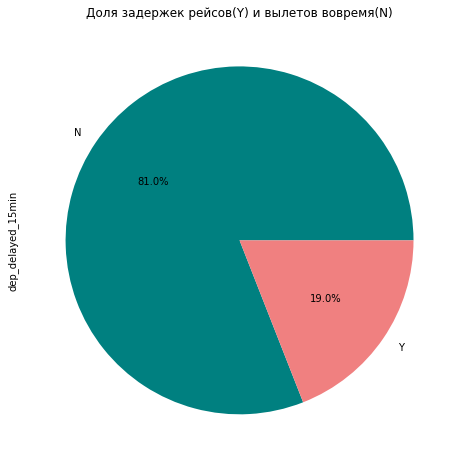

In [32]:
colors = ['teal', 'lightcoral']
df['dep_delayed_15min'].value_counts(normalize=True).plot(kind = 'pie', figsize=(8,8), colors = colors, autopct='%1.1f%%')
plt.title('Доля задержек рейсов(Y) и вылетов вовремя(N)');

## 2) Зависимость количества задержек рейсов от длины пути, который предстоит пролететь самолёту

In [34]:
df1 = df[(df['dep_delayed_15min'] == 'Y')]['Distance'].value_counts(ascending=True).to_frame()
df2 = pd.DataFrame({'Distance' : df1.index, 'Delays' : df1['Distance'].values})

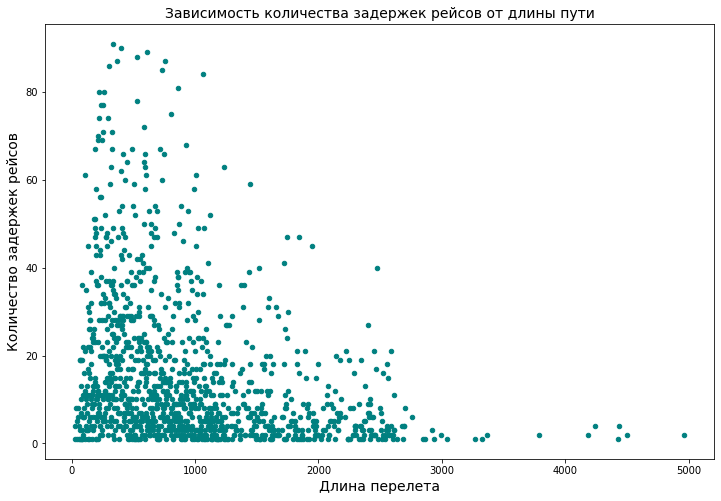

In [36]:
df2.plot.scatter(x = 'Distance', y = 'Delays', color ='teal', figsize = (12, 8));
plt.title('Зависимость количества задержек рейсов от длины пути', fontsize = 14);
plt.xlabel('Длина перелета', fontsize = 14)
plt.ylabel('Количество задержек рейсов', fontsize = 14)
plt.show()

## 3) Топ 5 направлений, для которых чаще всего происходят задержки рейсов 

In [12]:
df3 = df[(df['dep_delayed_15min'] == 'Y')][['Origin', 'Dest']].value_counts(ascending=False)

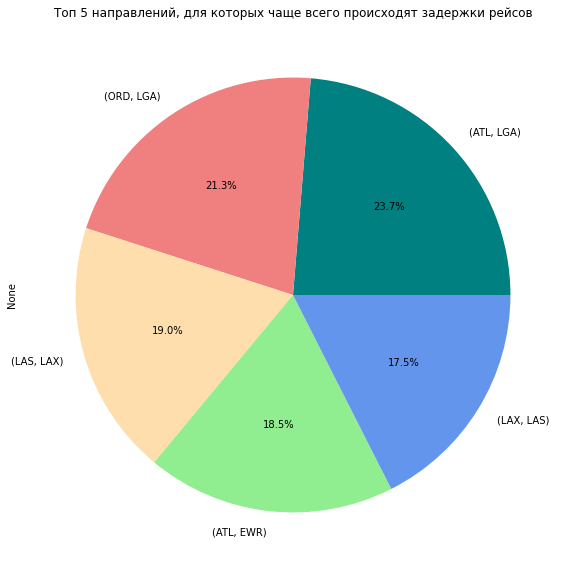

In [37]:
colors = ['teal', 'lightcoral', 'navajowhite', 'lightgreen', 'cornflowerblue']
df3.head(5).plot(kind = 'pie', figsize=(10,10), colors = colors, autopct='%1.1f%%')
plt.title('Топ 5 направлений, для которых чаще всего происходят задержки рейсов')
plt.show()

## 4) В какие времена года чаще всего происходят задержки рейсов

In [38]:
df4 = df[(df['dep_delayed_15min'] == 'Y')].replace(
    {'Month' : {'c-1':'January', 'c-2':'February', 'c-3':'March', 'c-4':'April', 'c-5':'May', 'c-6':'June',
                'c-7':'July', 'c-8':'August', 'c-9':'September', 'c-10':'October','c-11':'November', 'c-12':'December'}})                   
df4_ = df4['Month'].value_counts(ascending=False).to_frame()

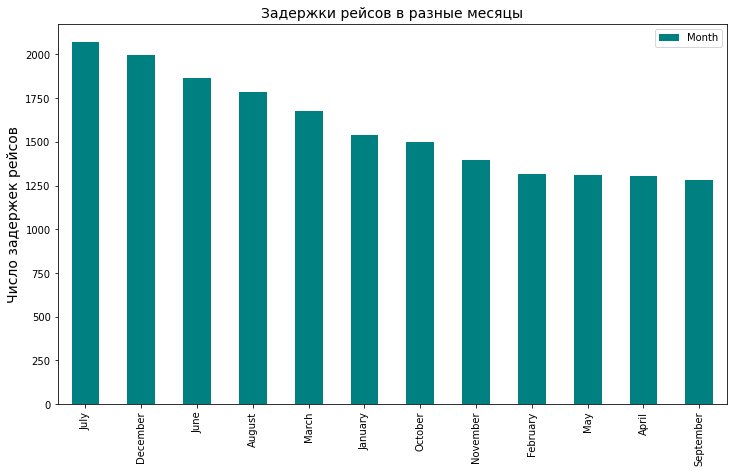

In [39]:
df4_.plot.bar(figsize = (12, 7), color = 'teal')
plt.title('Задержки рейсов в разные месяцы', fontsize = 14);
plt.ylabel('Число задержек рейсов', fontsize = 14)
plt.show()

## 5) Топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы

In [40]:
not_delayed = df[(df['dep_delayed_15min'] == 'N')]['UniqueCarrier'].value_counts(ascending=False)
delayed = df[(df['dep_delayed_15min'] == 'Y')]['UniqueCarrier'].value_counts(ascending=False)
ratio = delayed/not_delayed
df5 = ratio.sort_values(ascending=True).iloc[0:10]

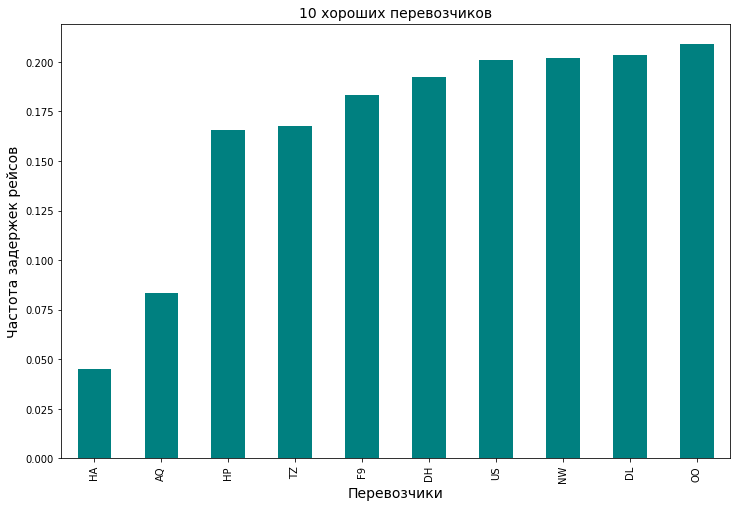

In [41]:
df5.plot.bar(figsize = (12, 8), color = 'teal')
plt.title('10 хороших перевозчиков', fontsize = 14);
plt.xlabel('Перевозчики', fontsize = 14)
plt.ylabel('Частота задержек рейсов', fontsize = 14)
plt.show()

## 6) Топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки рейсов

In [42]:
not_delayed = df[(df['dep_delayed_15min'] == 'N')]['Origin'].value_counts(ascending=False)
delayed = df[(df['dep_delayed_15min'] == 'Y')]['Origin'].value_counts(ascending=False)
ratio = delayed/not_delayed
df6 = ratio.sort_values(ascending=False).iloc[0:10]

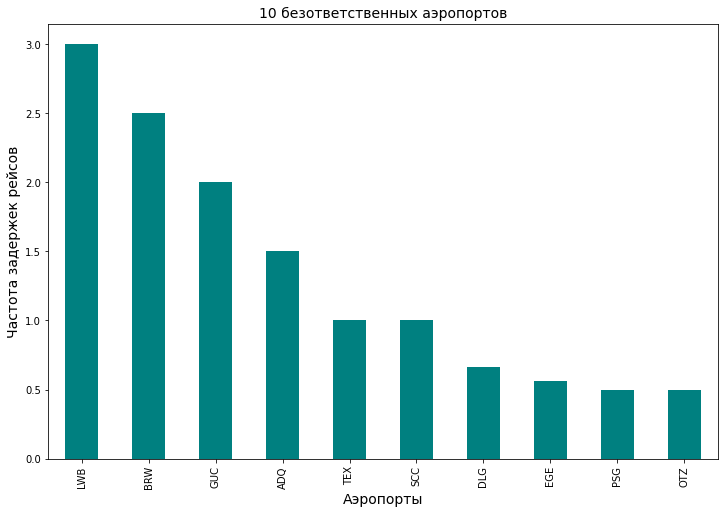

In [43]:
df6.plot.bar(figsize = (12, 8), color = 'teal')
plt.title('10 безответственных аэропортов', fontsize = 14);
plt.xlabel('Аэропорты', fontsize = 14)
plt.ylabel('Частота задержек рейсов', fontsize = 14)
plt.show()

## 7) Необычная зависимость количества задержек рейсов от имеющихся данных

Найдем, в какой день месяца чаще всего происходят задержки рейсов.

In [44]:
df7 = df[(df['dep_delayed_15min'] == 'Y')]['DayofMonth'].value_counts(ascending=False).to_frame()        

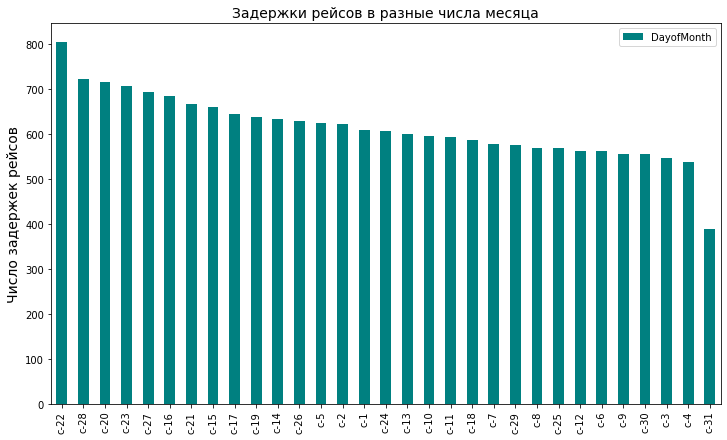

In [46]:
df7.plot.bar(figsize = (12, 7), color = 'teal')
plt.title('Задержки рейсов в разные числа месяца', fontsize = 14);
plt.ylabel('Число задержек рейсов', fontsize = 14)
plt.show()